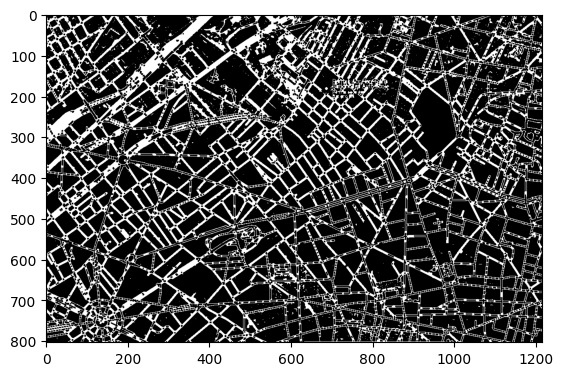

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the image
image = cv2.imread('/Users/yashshah/Desktop/applied_ai/search/map_example/paris_map_high2.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to get a binary image
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Use morphological operations to clean up the image
kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Display the preprocessed image
plt.imshow(cleaned, cmap='gray')
plt.show()

In [3]:
def create_graph(image):
    graph = {}
    rows, cols = image.shape
    for r in range(rows):
        for c in range(cols):
            if image[r, c] == 255:  # white pixel
                neighbors = []
                if r > 0 and image[r - 1, c] == 255:
                    neighbors.append((r - 1, c))
                if r < rows - 1 and image[r + 1, c] == 255:
                    neighbors.append((r + 1, c))
                if c > 0 and image[r, c - 1] == 255:
                    neighbors.append((r, c - 1))
                if c < cols - 1 and image[r, c + 1] == 255:
                    neighbors.append((r, c + 1))
                graph[(r, c)] = neighbors
    return graph

graph = create_graph(cleaned)

def get_random_points(graph):
    points = list(graph.keys())
    start = random.choice(points)
    goal = random.choice(points)
    while np.linalg.norm(np.array(start) - np.array(goal)) < 100:  # Ensure they are far apart
        goal = random.choice(points)
    return start, goal

start, goal = get_random_points(graph)
# start, goal = (703,126), (205,1061)
#Start: (703, 126)
#Goal: (205, 1061)
print(f"Start: {start}, Goal: {goal}")

def dfs(start, goal, graph):
    stack = [start]
    visited = set()
    parent = {start: None}

    while stack:
        node = stack.pop()
        if node == goal:
            break
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    stack.append(neighbor)
                    parent[neighbor] = node

    path = []
    while goal:
        path.append(goal)
        goal = parent[goal]
    path.reverse()
    return path

def bfs(start, goal, graph):
    queue = [start]
    visited = set()
    parent = {start: None}

    while queue:
        node = queue.pop(0)
        if node == goal:
            break
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append(neighbor)
                    parent[neighbor] = node

    path = []
    while goal:
        path.append(goal)
        goal = parent[goal]
    path.reverse()
    return path

import heapq

def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def greedy_bfs(start, goal, graph):
    queue = [(0, start)]
    visited = set()
    parent = {start: None}

    while queue:
        _, node = heapq.heappop(queue)
        if node == goal:
            break
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    heapq.heappush(queue, (heuristic(neighbor, goal), neighbor))
                    parent[neighbor] = node

    path = []
    while goal:
        path.append(goal)
        goal = parent[goal]
    path.reverse()
    return path

def a_star(start, goal, graph):
    queue = [(0, start)]
    visited = set()
    parent = {start: None}
    g_costs = {start: 0}

    while queue:
        _, node = heapq.heappop(queue)
        if node == goal:
            break
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                tentative_g_cost = g_costs[node] + heuristic(node, neighbor)
                if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                    g_costs[neighbor] = tentative_g_cost
                    f_cost = tentative_g_cost + heuristic(neighbor, goal)
                    heapq.heappush(queue, (f_cost, neighbor))
                    parent[neighbor] = node

    path = []
    while goal:
        path.append(goal)
        goal = parent[goal]
    path.reverse()
    return path

def draw_path(image, path):
    for i in range(len(path) - 1):
        cv2.line(image, path[i][::-1], path[i + 1][::-1], (0, 0, 255), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

Start: (320, 406), Goal: (95, 777)


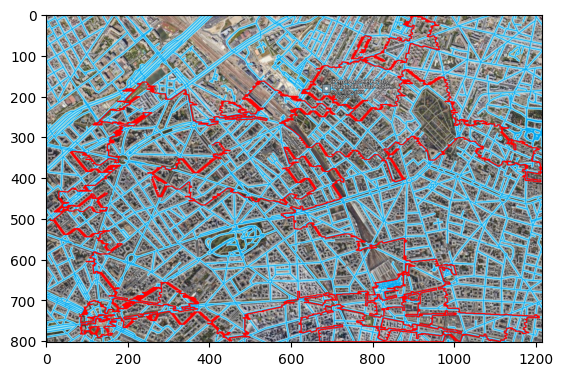

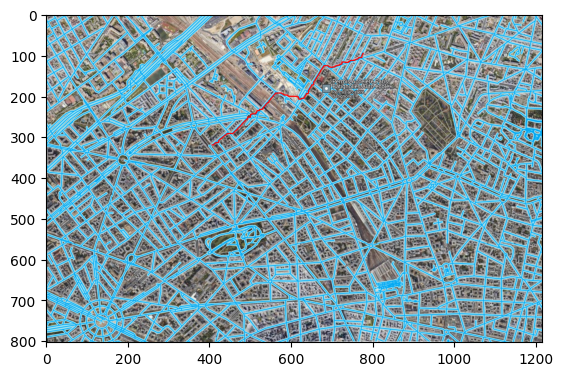

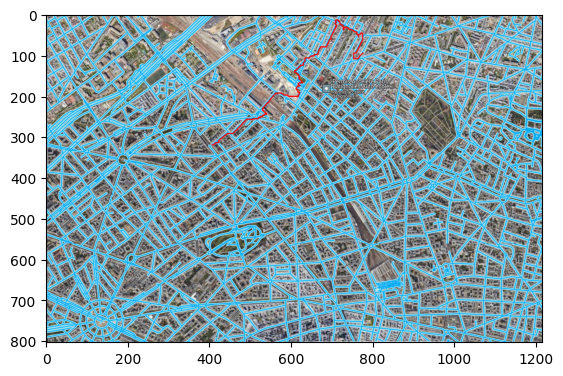

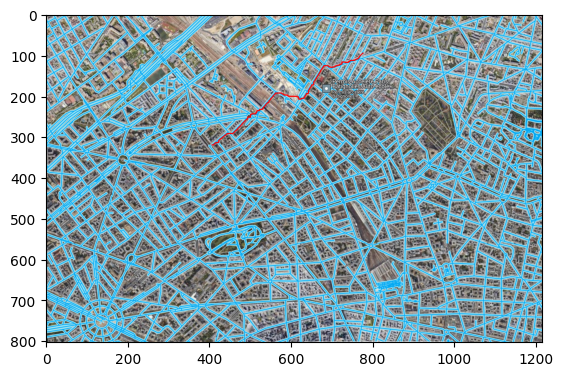

In [4]:
path_dfs = dfs(start, goal, graph)
path_bfs = bfs(start, goal, graph)
path_greedy_bfs = greedy_bfs(start, goal, graph)
path_a_star = a_star(start, goal, graph)

draw_path(image.copy(), path_dfs)
draw_path(image.copy(), path_bfs)
draw_path(image.copy(), path_greedy_bfs)
draw_path(image.copy(), path_a_star)